In [8]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import pandas as pd
import os, glob
import numpy as np

Merge all files into one CVS file

In [166]:
os.chdir(".")
all_filenames = [i for i in glob.glob('*.{}'.format('csv'))]
combinedf = pd.concat([pd.read_csv(f) for f in all_filenames ],sort=False)
combinedf.to_csv( "Players.csv", index=False, encoding='utf-8')

In [9]:
Players = pd.read_csv('Players.csv')

In [10]:
Players.head()

,Season,League,Rk,Player,Nation,Pos,Squad,Age,Born,MP,Starts,Min,Gls,Ast,PK,PKatt,CrdY,CrdR
0,2017-2018,Bundesliga,1,David Abraham,ar ARG,DF,Eint Frankfurt,31.0,1986.0,27,27,"2,302",0,2,0,0,3,0
1,2017-2018,Bundesliga,2,Amir Abrashi,al ALB,MF,Freiburg,27.0,1990.0,12,11,850,0,0,0,0,2,0
2,2017-2018,Bundesliga,3,René Adler,de GER,GK,Mainz 05,32.0,1985.0,14,14,"1,260",0,0,0,0,0,0
3,2017-2018,Bundesliga,4,Ailton,br BRA,"DF,FW",Stuttgart,22.0,1995.0,5,1,108,0,0,0,0,0,0
4,2017-2018,Bundesliga,5,Manuel Akanji,ch SUI,DF,Dortmund,22.0,1995.0,11,10,904,0,0,0,0,2,0


In [11]:
Strikers = Players.copy()
agressive = Players.copy()
oldest = Players.copy()
agg_players = Players.copy()

Top 5 Strikers in Europe

In [12]:
Strikers = Strikers.groupby('Player').sum()
Strikers.sort_values(by=['Gls'], inplace=True, ascending=False)
Strikers = Strikers.head(5)
Strikers.drop(['Rk', 'Age', 'Born', 'Starts', 'PK', 'CrdY', 'CrdR', 'PKatt'], axis=1, inplace=True)
Strikers.head()

,MP,Gls,Ast
Player,,,
Lionel Messi,103,95,46
Robert Lewandowski,94,85,13
Ciro Immobile,106,80,21
Cristiano Ronaldo,91,78,18
Mohamed Salah,108,73,28


Top 5 Strikers Bar Chart

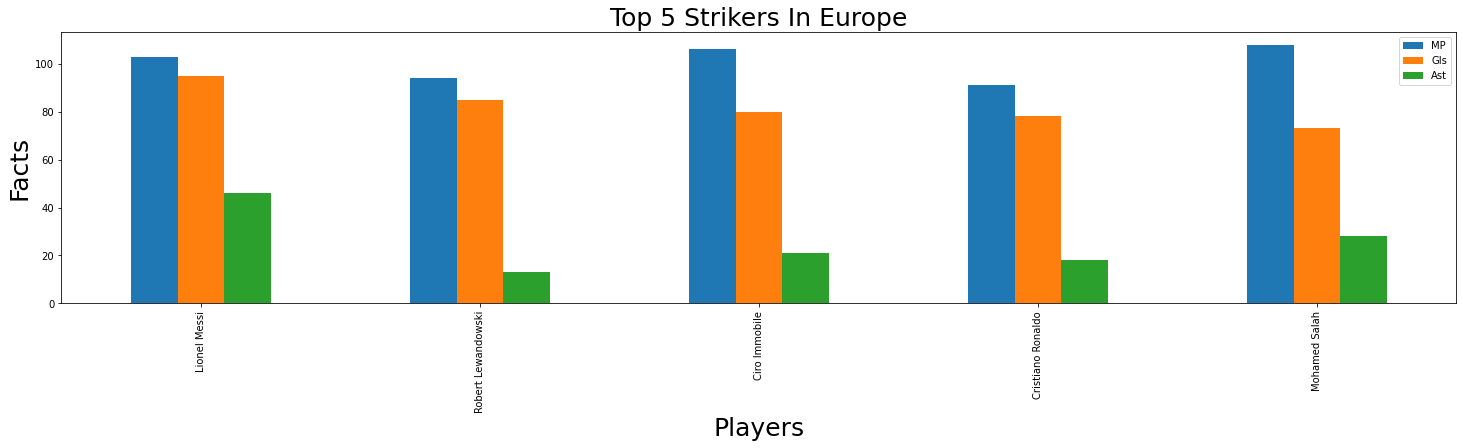

In [13]:
Strikers.plot.bar()
plt.xlabel("Players", fontsize=25)
plt.ylabel("Facts", fontsize=25)
plt.title("Top 5 Strikers In Europe", fontsize=25)
plt.rcParams['figure.figsize'] = (25,5);
plt.show()

Top 5 Strikers Goals Pie

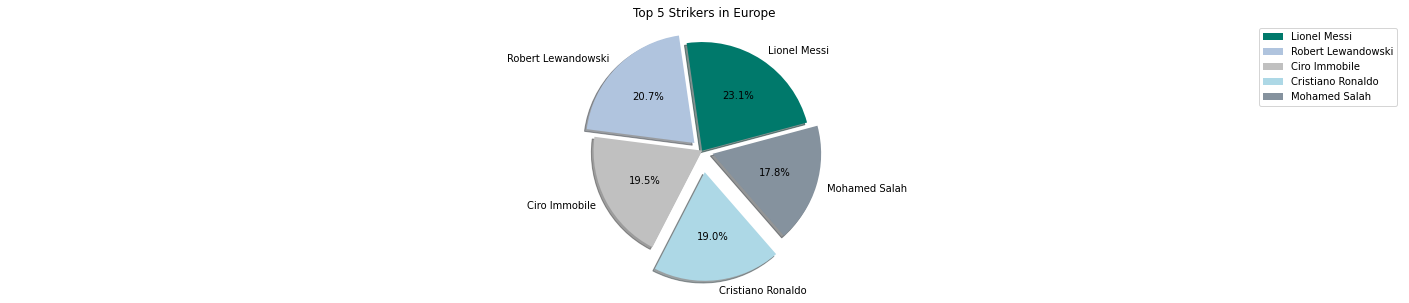

In [14]:
Goals = [95,85,80,78,73]

my_labels = 'Lionel Messi','Robert Lewandowski','Ciro Immobile', 'Cristiano Ronaldo', 'Mohamed Salah'
my_colors = ['#00796B','lightsteelblue','silver','lightblue','#85929E']
my_explode = (0, 0.1, 0, 0.2, 0.1)
textprops = {"fontsize":55}
plt.pie(Goals, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Top 5 Strikers in Europe')
plt.axis('equal')
plt.legend()
plt.show()

Players Age Analysis

In [15]:
oldest.describe()

,Rk,Age,Born,MP,Starts,Gls,Ast,PK,PKatt,CrdY,CrdR
count,7444.000000,7439.000000,7439.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000,7444.000000
mean,248.682966,25.330958,1992.325850,18.629232,14.696131,1.797421,1.222730,0.166980,0.216416,2.697206,0.146024
std,143.353144,4.468665,4.542976,11.378167,11.338386,3.402556,2.000628,0.742687,0.884150,2.793812,0.435289
min,1.000000,14.000000,1977.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,22.000000,1989.000000,8.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,249.000000,25.000000,1993.000000,19.000000,13.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,373.000000,28.000000,1996.000000,29.000000,24.000000,2.000000,2.000000,0.000000,0.000000,4.000000,0.000000
max,499.000000,41.000000,2004.000000,38.000000,38.000000,36.000000,21.000000,14.000000,15.000000,17.000000,5.000000


In [17]:
num_players = oldest.count()[0]
pd.DataFrame({"Total Players": [num_players]})

player_demographics = oldest.loc[:, ["Player", "Age", "Gls"]]
age_bins = [9.90, 19.90, 29.90, 39.90, 99999]
group_names = ["10-19", "20-29", "30-39", "40+"]

player_demographics["Age Ranges"] = pd.cut(player_demographics["Age"], age_bins, labels=group_names)

age_demographics_totals = player_demographics["Age Ranges"].value_counts()
age_demographics_percents = age_demographics_totals / num_players
age_demographics = pd.DataFrame({"Age Count": age_demographics_totals, "Age Percentage": age_demographics_percents,})

age_demographics['Age Percentage'] = age_demographics['Age Percentage'].map("{:,.2%}".format)

age_demographics = age_demographics.sort_index()
age_demographics

,Age Count,Age Percentage
10-19,701,9.42%
20-29,5328,71.57%
30-39,1404,18.86%
40+,6,0.08%


C:\Users\hanys\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0.5, 1.0, 'European League Players Age Categorization')

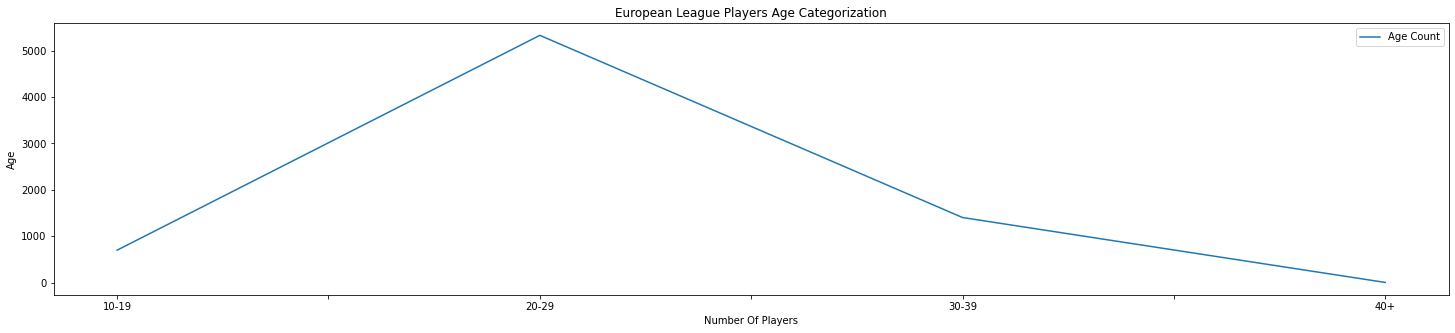

In [24]:
age_demographics.plot.line()
plt.xlabel("Number Of Players")
plt.ylabel("Age")
plt.title("European League Players Age Categorization")

Top 10 Players with the greatest number of Red Cards

In [139]:
most_agg_players = agg_players.set_index(['Player']).select_dtypes('number')
most_agg_players.drop(['Rk', 'Age', 'Born', 'MP', 'Starts', 'Gls', 'Ast', 'PK', 'PKatt', 'CrdY'], axis=1, inplace=True)
most_agg_players.sort_values(by=['CrdR'], inplace=True, ascending=False)
most_agg_players.drop_duplicates()
RedCards = most_agg_players.head(10)
RedCards.head(10)

,CrdR
Player,
Prince-Désir Gouano,5
Zdravko Kuzmanović,4
Wilfred Ndidi,4
Presnel Kimpembe,4
Sergio Ramos,4
Nicolas Pallois,4
Francesco Magnanelli,4
Edoardo Goldaniga,4
Morgan Amalfitano,3


<ipython-input-163-fe66d4f93a97>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


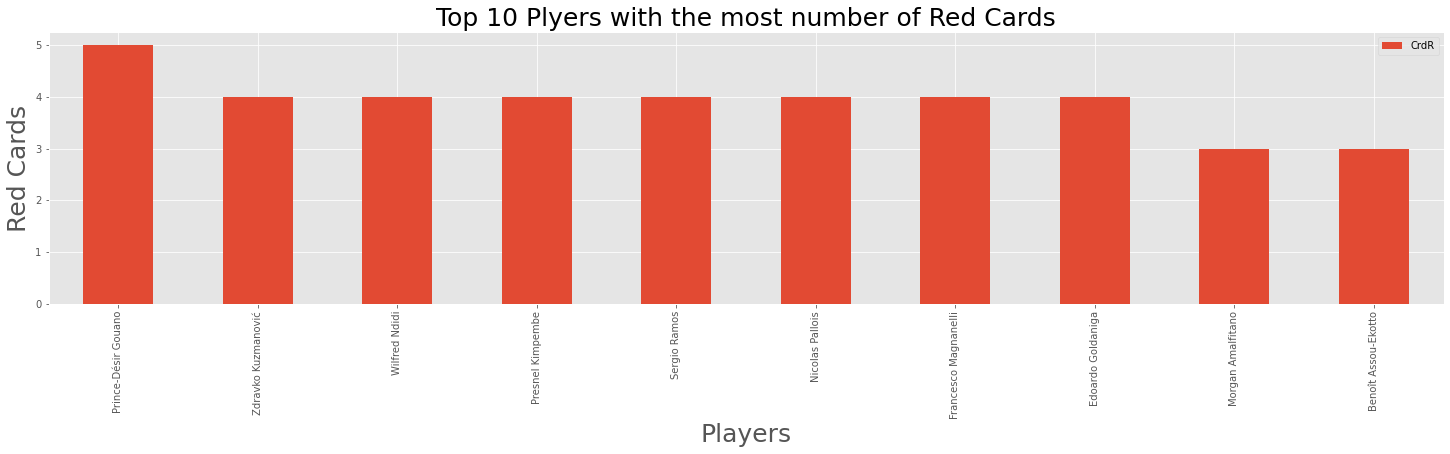

In [163]:
RedCards.plot.bar()
plt.xlabel("Players", fontsize=25)
plt.ylabel("Red Cards", fontsize=25)
plt.title("Top 10 Plyers with the most number of Red Cards", fontsize=25)
plt.rcParams['figure.figsize'] = (25,5);
plt.show()

Text(0.5, 1.0, 'Top 10 Players with the greatest number of Red Cards')

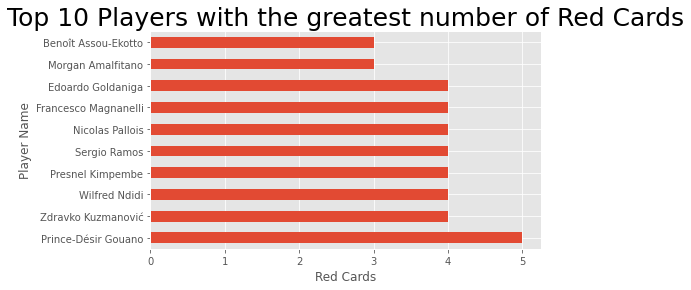

In [180]:
plt.style.available
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7,4))
RedCards.plot(kind='barh', legend = False, ax=ax)
ax.set_xlabel('Red Cards')
ax.set_ylabel('Player Name')
plt.title("Top 10 Players with the greatest number of Red Cards", fontsize=25)

Top 10 Players with the greatest number of Yellow Cards

In [141]:
most_agg_players_R = agg_players.set_index(['Player']).select_dtypes('number')
most_agg_players_R.drop(['Rk', 'Age', 'Born', 'MP', 'Starts', 'Gls', 'Ast', 'PK', 'PKatt', 'CrdR'], axis=1, inplace=True)
most_agg_players_R.sort_values(by=['CrdY'], inplace=True, ascending=False)
most_agg_players_R.drop_duplicates()
Yellow_Cards = most_agg_players_R.head(10)
Yellow_Cards.head(10)

,CrdY
Player,
Mario Gaspar,17
Éver Banega,17
Álvaro González,17
Klaus Gjasula,17
Gianluca Mancini,16
Jefferson Lerma,16
Daniel Parejo,15
Cristian Romero,15
Oier Sanjurjo,15


<ipython-input-181-a29719588185>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


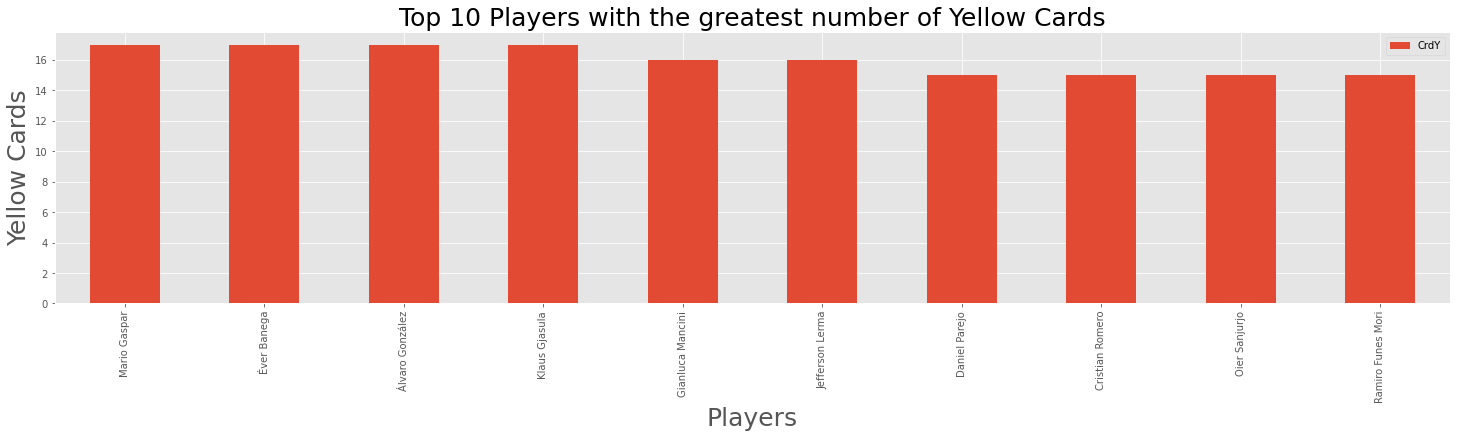

In [181]:
Yellow_Cards.plot.bar()
plt.xlabel("Players", fontsize=25)
plt.ylabel("Yellow Cards", fontsize=25)
plt.title("Top 10 Players with the greatest number of Yellow Cards", fontsize=25)
plt.rcParams['figure.figsize'] = (25,5);
plt.show()

Text(0.5, 1.0, 'Top 10 Players with the greatest number of Yellow Cards')

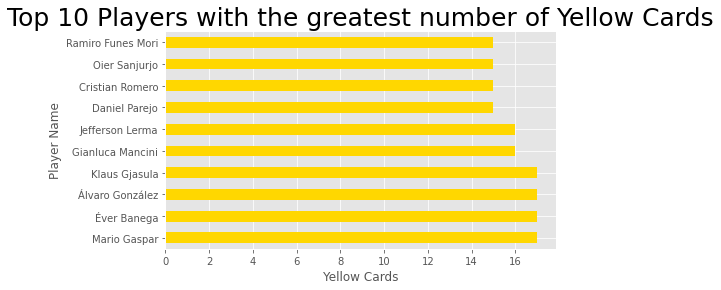

In [182]:
plt.style.available
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(7,4))
Yellow_Cards.plot(kind='barh', legend = False, ax=ax, color = 'gold')
ax.set_xlabel('Yellow Cards')
ax.set_ylabel('Player Name')
plt.title("Top 10 Players with the greatest number of Yellow Cards", fontsize=25)